# Mirage : Welcome to the other side

Function to resize the images 

In [1]:
def resize_img(file_path, k):
    img_new = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

    # set the ratio of resized image
    width = int((img_new.shape[1])/k)
    height = int((img_new.shape[0])/k)

    # resize the image by resize() function of openCV library
    return cv2.resize(img_new, (width, height), interpolation=cv2.INTER_AREA)

In [2]:
from IPython.display import Image
import numpy as np
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf, ImageOps as piliops
import pandas as pd

TINT_COLOR = (255, 255, 255)  # Black
OPACITY = int(255 * .75)
FONT = pilf.truetype("./fonts/OldNewspaperTypes.ttf", 24) # Font
IMG_BASE_WIDTH = 600
IMG_NUMBERS = 47

def convert_from_image_to_cv2(img: Image) -> np.ndarray:
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

Function to cartoonizing the images

In [3]:
import cv2 
def convert_image_to_cartoon_with_resize(file_path, blur, line, **kwargs):
    try:
        if 'resize' in kwargs.keys() and kwargs.get('resize'):
            if 'resizeValue' not in kwargs.keys():
                raise Exception('You need to pass resize value as you enabled resize function')
            imgc = resize_img(file_path, kwargs.get('resizeValue'))
        else:
            imgc = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

        line_size = line
        blur_value = blur

        gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.medianBlur(gray, blur_value)
        bigedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
        bigedges_pil = cv2.cvtColor(bigedges, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
        return cv2.bitwise_and(imgc, imgc, mask=bigedges)
    except Exception as error:
        print('Error occured: ' + repr(error))

Function to add text to the image

In [4]:
def adding_text_to_image(img, text, font="Noto_Sans_Devanagari", font_size=20, nlines=2):
    k = font_size
    my_font = pilf.truetype("./fonts/OldNewspaperTypes.ttf", k) if font=="OldNewspaperTypes" else pilf.truetype("./fonts/Noto_Sans_Devanagari/NotoSansDevanagari-VariableFont_wdth,wght.ttf", k)
    
    cblimg_pil = pili.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

    overlay = pili.new('RGBA', cblimg_pil.size, TINT_COLOR+(0,))
    draw = pild.Draw(overlay)
   
    l, t, w, h = my_font.getbbox(text)
    num_lines = nlines
    x, y = 0, cblimg_pil.height - (num_lines)*h-10
    draw.rectangle((x, y, x + cblimg_pil.width, y + (num_lines)*h+10), fill=TINT_COLOR+(OPACITY,))
    if k == 1:
        draw.text((x+10, y+5), text, fill=(248,248,248), font=my_font) #, stroke_width=1)
    elif k < 8:
        draw.text((x+10, y+5), text, fill=(248,248,248), font=my_font)
    else:
        draw.text((x+10, y+5), text, fill=(0, 71, 171), font=my_font) #, stroke_width=1)

    cblimg_pil = pili.alpha_composite(cblimg_pil, overlay)
    cblimg_pil = cblimg_pil.convert("RGB")

    return convert_from_image_to_cv2(cblimg_pil)

In [5]:
try:
    cblimg = convert_image_to_cartoon_with_resize('./images/movie_poster.jpg', 7, 11)
    cblimg = adding_text_to_image(cblimg, "Mirage: Welcome to the other side", font="OldNewspaperTypes", font_size=100)
    im = pili.fromarray(cv2.cvtColor(cblimg, cv2.COLOR_BGR2RGB))
    im.save("./images/poster.jpg")
    display(pili.fromarray(cblimg_pil))
except Exception as e:
    print(e)

name 'cblimg_pil' is not defined


In [6]:
def results(input_path, output_path, text, no_of_lines, font_size, font):
    try:
        cartoon_img = convert_image_to_cartoon_with_resize(input_path, 7, 11)
        cartoon_img_with_text = adding_text_to_image(cartoon_img, text, font=font, font_size=font_size, nlines=no_of_lines)
        return cartoon_img_with_text
    except Exception as e:
        print(e)

Function to arrange images in horizontal strip after adding text to the cartoonized image

In [7]:
def simple_row(input_path, output_path, text, no_of_lines, font_size, font="Noto_Sans_Devanagari"):
    process_imgs = [results(i, j, k, l, m, font) for i, j, k, l, m in zip(input_path, output_path, text, no_of_lines, font_size)]
    
    heighto = int(process_imgs[0].shape[0])
    widtho = int(process_imgs[0].shape[1])
    
    width = 260
    height = int(heighto / widtho * width) + 20
    processed_img_dim = (width, height)
    processed_img_src = [ cv2.resize(process_imgs[i], processed_img_dim, interpolation = cv2.INTER_AREA) for i in range(len(input_path))]

    # add borders
    white = [255,255,255]
    strip_imgs = [ cv2.copyMakeBorder(i, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=white) for i in processed_img_src ]


    # stack them horizontally
    return np.concatenate([ strip_imgs[i] for i in range(0,len(input_path)) ], axis=1)


Sample editing for 4 images for English text

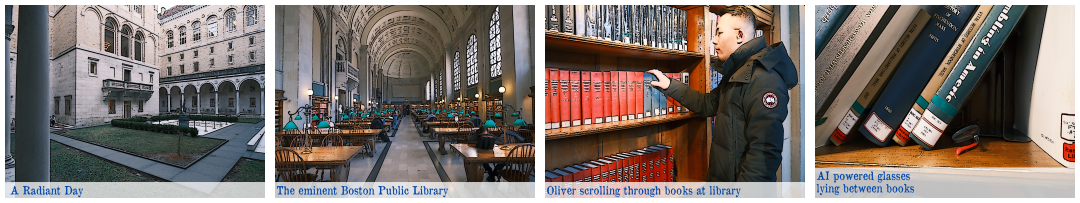

In [8]:
rows4 = simple_row (
         ['./images/raw_images/scene1.jpg','./images/raw_images/scene2.jpg', './images/raw_images/scene3.jpg', './images/raw_images/scene4.jpg'],
         ['pencil', 'pencil', 'buildings', 'buildings'],
         [' A Radiant Day', 'The eminent Boston Public Library', 'Oliver scrolling through books at library', 'AI powered glasses\nlying between books'],
         [1, 1, 1, 2],
         [80, 80, 80, 80],
         "OldNewspaperTypes"
        )
rows4_pil = cv2.cvtColor(rows4, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(pili.fromarray(rows4_pil))


Sample editing for 4 images for Hindi (regional) text

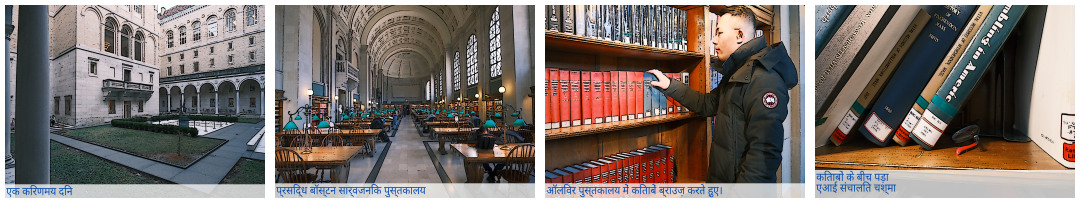

In [9]:
rows4 = simple_row (
         ['./images/raw_images/scene1.jpg','./images/raw_images/scene2.jpg', './images/raw_images/scene3.jpg', './images/raw_images/scene4.jpg'],
         ['pencil', 'pencil', 'buildings', 'buildings'],
         ["एक किरणमय दिन", 'प्रसिद्ध बॉस्टन सार्वजनिक पुस्तकालय', 'ऑलिवर पुस्तकालय में किताबें ब्राउज़ करते हुए।', 'किताबों के बीच पड़ा\nएआई संचालित चश्मा'],
         [1, 1, 1, 2],
         [80, 80, 80, 80], "Noto_Sans_Devanagari"
        )
rows4_pil = cv2.cvtColor(rows4, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(pili.fromarray(rows4_pil))

Added all images paths to csv along with the dialogues.
Also, added image paths to save horizontal strips of images after creation.

In [10]:
import pandas as pd
data = pd.read_csv('./movie_dialogues.csv')
data.head(5)

,IMAGE,ENGLISH,HINDI,NUMBER_OF_LINE,NUMBER_OF_LINE_ENGLISH,STRIP_HINDI,STRIP_HINDI.1
0,./images/raw_images/scene1.jpg,A Radiant Day,एक किरणमय दिन,0,0,./images/processed_images/strip0.jpg,./images/processed_images/strip0.jpg
1,./images/raw_images/scene2.jpg,The eminent Boston Public Library,प्रसिद्ध बॉस्टन सार्वजनिक पुस्तकालय,1,1,./images/processed_images/strip1.jpg,./images/processed_images/strip1.jpg
2,./images/raw_images/scene3.jpg,Oliver scrolling through books at library,ऑलिवर पुस्तकालय में किताबें ब्राउज़ करते हुए।,1,1,./images/processed_images/strip2.jpg,./images/processed_images/strip2.jpg
3,./images/raw_images/scene4.jpg,AI powered glasses\nlying between books,किताबों के बीच पड़ा\nएआई संचालित चश्मा,2,2,./images/processed_images/strip3.jpg,./images/processed_images/strip3.jpg
4,./images/raw_images/scene5.jpg,Oliver pulls out a book\nAI glasses fall down,ओलिवर एक किताब निकालता है\nएआई चश्मा नीचे गिर ...,2,2,./images/processed_images/strip4.jpg,./images/processed_images/strip4.jpg


In [11]:
def split_list(original_list, records_per_sublist):
    sublists = []
    for i in range(0, len(original_list), records_per_sublist):
        sublists.append(original_list[i:i + records_per_sublist])
    return sublists

The below function will will create a Horizontal strip, by reading data from csv. 
It will rewrite the strip in csv to create vertical strips (pages), which will be converted to PDF later on.

In [12]:
import csv
def write_img_to_disk_and_csv(strip, sublist, dialouge_sublist, no_of_line, hindi):

    width, height = (400, 225)

    # Open the existing CSV file
    with open('./movie_dialogues.csv', 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        csv_data = list(csv_reader)

    # Update a specific cell
    row_index = 0
    col_index = 5
    new_value = strip
    csv_data[row_index][col_index] = new_value

    for i, sublist in enumerate(sublists):
        im = simple_row (
                 sublist,
                 ['', '', '', ''],
                 [i.replace("\\n", "\n") for i in dialouge_sublist[i]],
                 [i + 1 for i in no_of_line[i]],
                 [80, 80, 80, 80],
                 "OldNewspaperTypes" if not hindi else "Noto_Sans_Devanagari"
                )
        im = pili.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        im.save(f"./images/processed_images/strip{i}.jpg")
        csv_data[i+1][col_index] = f"./images/processed_images/strip{i}.jpg"

    # # Write the modified data to a new CSV file
    with open('./movie_dialogues.csv', 'w', newline='') as updated_csvfile:
        csv_writer = csv.writer(updated_csvfile)
        csv_writer.writerows(csv_data)

English Movie

Here, we split out 80 images set into subsets of 4 to create horizontal strip

In [13]:
# Number of records per sublist
data = pd.read_csv('./movie_dialogues.csv')
records_per_sublist = 4

# Split the original list into sublists
sublists = split_list([data.iloc[i][0] for i in range(80)], records_per_sublist)
dialouge_sublist = split_list([data.iloc[i][1] for i in range(80)], records_per_sublist)
no_of_line_english = split_list([data.iloc[i][3] for i in range(80)], records_per_sublist)

write_img_to_disk_and_csv("HINDI", sublists, dialouge_sublist, no_of_line_english, False)

Function to create the movie pdf by adding horizontal strips into vertical strips and combining them to form a cluster of pages.
We save those pages back to the /images folder 

In [14]:
from PIL import Image
data = pd.read_csv('./movie_dialogues.csv')
def create_movie():
    count = 0
    for i in range(5):
        list_im = [data.iloc[i][5] for i in range(count, count+4, 1)]

        imgs = [ Image.open(i) for i in list_im ]

        # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

        # save that beautiful picture
        imgs_comb = Image.fromarray( imgs_comb)
        imgs_comb.save(f'./images/processed_images/page{i}.jpg' ) 
        count += 4
create_movie()

/var/folders/5v/r1ncqvs52wl9jc1_bf2gsgpw0000gn/T/ipykernel_16754/3658592537.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )


Using the images saved with 'page' suffix, we combine them into a pdf. 
Our movie is ready!!

In [15]:
from PIL import Image
from fpdf import FPDF

#pdf = FPDF()
cover = Image.open('./images/raw_images/scene1.jpg')
width, height = cover.size
print(cover.size)
pdf = FPDF(unit = "pt", format = [width, height])
    
# imagelist is the list with all image filenames
imagelist = [f'./images/poster.jpg',  
             f'./images/processed_images/page0.jpg', 
             f'./images/processed_images/page1.jpg', 
             f'./images/processed_images/page2.jpg', 
             f'./images/processed_images/page3.jpg',
             f'./images/processed_images/page4.jpg']

for image in imagelist:
    pdf.add_page()
    pdf.image(image, 0, 0, width, height)
pdf.output("./movie_english.pdf", "F")
print("Your movie is ready!")

(2048, 1365)
Your movie is ready!


Hindi Movie

In [16]:
# Number of records per sublist
data = pd.read_csv('./movie_dialogues.csv')
records_per_sublist = 4

# Split the original list into sublists
sublists = split_list([data.iloc[i][0] for i in range(80)], records_per_sublist)
dialouge_sublist = split_list([data.iloc[i][2] for i in range(80)], records_per_sublist)
no_of_line_hindi = split_list([data.iloc[i][4] for i in range(80)], records_per_sublist)

write_img_to_disk_and_csv("STRIP_HINDI", sublists, dialouge_sublist, no_of_line_hindi, True)

In [17]:
from PIL import Image
data = pd.read_csv('./movie_dialogues.csv')
def create_movie():
    count = 0
    for i in range(5):
        list_im = [data.iloc[i][6] for i in range(count, count+4, 1)]

        imgs = [ Image.open(i) for i in list_im ]

        # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

        # save that beautiful picture
        imgs_comb = Image.fromarray( imgs_comb)
        imgs_comb.save(f'./images/processed_images/page{i}_hindi.jpg' ) 
        count += 4
create_movie()

/var/folders/5v/r1ncqvs52wl9jc1_bf2gsgpw0000gn/T/ipykernel_16754/3724764535.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )


In [18]:
from PIL import Image
from fpdf import FPDF

#pdf = FPDF()
cover = Image.open('./images/raw_images/scene1.jpg')
width, height = cover.size
print(cover.size)
pdf = FPDF(unit = "pt", format = [width, height])
    
# imagelist is the list with all image filenames
imagelist = [f'./images/poster.jpg',   
             f'./images/processed_images/page0_hindi.jpg', 
             f'./images/processed_images/page1_hindi.jpg', 
             f'./images/processed_images/page2_hindi.jpg', 
             f'./images/processed_images/page3_hindi.jpg',
             f'./images/processed_images/page4_hindi.jpg']

for image in imagelist:
    pdf.add_page()
    pdf.image(image, 0, 0, width, height)
pdf.output("./movie_hindi.pdf", "F")
print("Your movie is ready!")

(2048, 1365)
Your movie is ready!
